# Análisis exploratorio de variables

El análisis exploratorio de variables se refiere a la selección de las mejores variables predictoras que optimicen el modelo, no solo en términos de efectividad del modelo, sino además en términos de eficiencia computacional. Por lo tanto implica evaluar qué variables son mejores predictoras para la ocurrencia de movimientos en masa, esto implica analisis univaridos, bivariados y multivariados que evalúen la relación entre cada variable predictora y la variable dependiente (). Por otra parte se debe tambien analizar la colinealidad entre las variables. Cuando existe multicorrelación entre las variables predictoras se está sobre cargando el modelo con variables que no aportan información adicional, y en muchos casos no se están cumpliendo las asumpciones estadísticas que exigen los modelos, y que se refieren a la independencia entre las variables predictoras.

# Settings

In [1]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.6 MB/s 


In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg

# Variables

(1389506,)

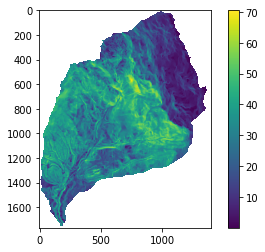

In [6]:
# Slope.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
pendiente = raster.read(1);

# nan limits.
lowerSlopeLimit = 0;
upperSlpoeLimit = 90;

# Reclasify nan.
pendiente = np.where(pendiente < lowerSlopeLimit, np.nan, pendiente);
pendiente = np.where(pendiente > upperSlpoeLimit, np.nan, pendiente);

# Render info.
plt.imshow(pendiente)
plt.colorbar();

# Vector
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

[0.0000000e+00 6.7693852e-03 6.9500757e-03 ... 3.5999222e+02 3.5999310e+02
           nan]


(1389506,)

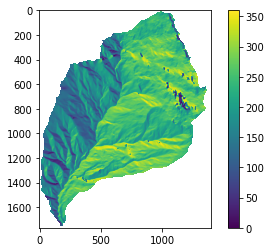

In [8]:
# Aspect.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_ASPECT_2m.tif?raw=true');
aspecto=raster.read(1);

# nan limits.
lowerAspectLimit = -1;
upperAspectLimit = 360;

# Reclasify nan.
aspecto=np.where(aspecto < lowerAspectLimit, np.nan, aspecto);
aspecto=np.where(aspecto > upperAspectLimit, np.nan, aspecto);

# Render info.
print(np.unique(aspecto));
plt.imshow(aspecto);
plt.colorbar();

# Vector
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
aspecto_vector_MenM.shape

(1389506,)

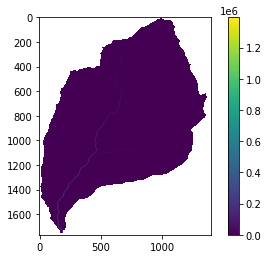

In [24]:
# Flow Accumulation

raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_FLOWACC.tif?raw=true')
flujo=raster.read(1)

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
flujo = msk * flujo;

flujo=np.where(flujo<0,np.nan,flujo)
flujo_vector=flujo.ravel()

plt.imshow(flujo)
plt.colorbar()

flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
flujo.shape
flujo_vector_MenM.shape

(1768, 1394)
[ 1.  2.  3. nan]
(1389506,)


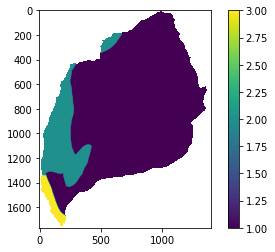

In [26]:
# Geology.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_GEO.tif?raw=true');
geologia = raster.read(1);
print(np.shape(geologia));

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
geologia = msk * geologia;

# nan limits.
lowerGeologyLimit = 1;
upperGeologyLimit = 3;

# Reclasify nan.
geologia = np.where(geologia < lowerGeologyLimit, np.nan, geologia);
geologia = np.where(geologia > upperGeologyLimit, np.nan, geologia);

# Render info.
print(np.unique(geologia));
plt.imshow(geologia);
plt.colorbar();

# Vector
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
print(geologia_vector_MenM.shape)

(1768, 1394)
[ 0.  1. nan]
(1389506,)


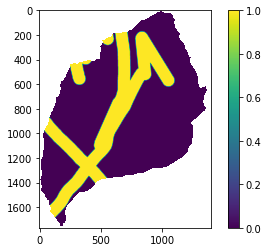

In [21]:
# Faults.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_FAULTS_100m.tif?raw=true');
faults = raster.read(1);
print(np.shape(faults));

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
faults = msk * faults;

# Render info.
print(np.unique(faults));
plt.imshow(faults);
plt.colorbar();

# Vector
faults_vector=faults.ravel()
faults_vector_MenM=faults_vector[~np.isnan(faults_vector)]
print(faults_vector_MenM.shape)

(1768, 1394)
[ 1.  2.  3.  4.  5. nan]
(1389506,)


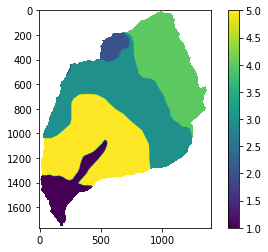

In [22]:
# Geomorfo.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_GEOMORFO_UNIDAD_2m.tif?raw=true');
geomorfo = raster.read(1);
print(np.shape(geomorfo));

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
geomorfo = msk * geomorfo;

# Render info.
print(np.unique(geomorfo));
plt.imshow(geomorfo);
plt.colorbar();

# Vector
geomorfo_vector=geomorfo.ravel()
geomorfo_vector_MenM=geomorfo_vector[~np.isnan(geomorfo_vector)]
print(geomorfo_vector_MenM.shape)

In [27]:
print(pendiente_vector_MenM.shape)
print(aspecto_vector_MenM.shape)
print(flujo_vector_MenM.shape)
print(geologia_vector_MenM.shape)
print(faults_vector_MenM.shape)
print(geomorfo_vector_MenM.shape)

(1389506,)
(1389506,)
(1389506,)
(1389506,)
(1389506,)
(1389506,)


# Inventario

(1389506,)

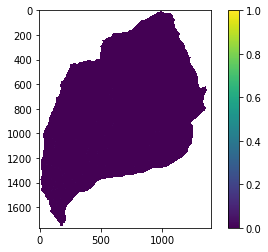

In [29]:
# Inventario

raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller4_InventarioMenM/AOI_MenM.tif?raw=true')
inventario=raster.read(1)

inventario=np.where(inventario<0,0,1)

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
inventario = msk * inventario;

inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

In [30]:
np.shape(inventario)

(1768, 1394)

In [31]:
np.unique(inventario)

array([ 0.,  1., nan])

# Process

In [32]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM, 'faults':faults_vector_MenM, 'geomorfo':geomorfo_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'flujo_acum', 'aspecto', 'geologia', 'faults', 'geomorfo']


In [33]:
df.head()

,inventario,pendiente,flujo_acum,aspecto,geologia,faults,geomorfo
0,0.0,9.761349,26.0,249.823837,1.0,0.0,4.0
1,0.0,9.097123,25.0,261.704651,1.0,0.0,4.0
2,0.0,9.127325,24.0,266.537048,1.0,0.0,4.0
3,0.0,9.400720,23.0,268.394501,1.0,0.0,4.0
4,0.0,9.616394,22.0,268.947296,1.0,0.0,4.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1389506 entries, 0 to 1389505
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   inventario  1389506 non-null  float64
 1   pendiente   1389506 non-null  float32
 2   flujo_acum  1389506 non-null  float64
 3   aspecto     1389506 non-null  float32
 4   geologia    1389506 non-null  float64
 5   faults      1389506 non-null  float64
 6   geomorfo    1389506 non-null  float64
dtypes: float32(2), float64(5)
memory usage: 63.6 MB


In [35]:
df1=df[(df["inventario"]==1) | (df["inventario"]==0).sample(frac=.1)]
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139007 entries, 1 to 1389495
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   inventario  139007 non-null  float64
 1   pendiente   139007 non-null  float32
 2   flujo_acum  139007 non-null  float64
 3   aspecto     139007 non-null  float32
 4   geologia    139007 non-null  float64
 5   faults      139007 non-null  float64
 6   geomorfo    139007 non-null  float64
dtypes: float32(2), float64(5)
memory usage: 7.4 MB


In [36]:
resumen=df1.describe().T
print(resumen)

               count         mean           std       min         25%  \
inventario  139007.0     0.000496      0.022274  0.000000    0.000000   
pendiente   139007.0    28.279728     14.083559  0.053637   16.335324   
flujo_acum  139007.0  1274.542584  32334.560487  0.000000    5.000000   
aspecto     139007.0   217.913910     67.946701  0.000000  173.925484   
geologia    139007.0     1.198112      0.454474  1.000000    1.000000   
faults      139007.0     0.255987      0.436416  0.000000    0.000000   
geomorfo    139007.0     3.646457      1.183865  1.000000    3.000000   

                   50%         75%           max  
inventario    0.000000    0.000000  1.000000e+00  
pendiente    30.271172   39.531193  7.052232e+01  
flujo_acum   13.000000   34.000000  1.393587e+06  
aspecto     232.131485  267.091736  3.599898e+02  
geologia      1.000000    1.000000  3.000000e+00  
faults        0.000000    1.000000  1.000000e+00  
geomorfo      4.000000    5.000000  5.000000e+00  


In [37]:
matriz=df.drop(['inventario'],axis=1) # función para eliminar una columna (axis=1)
matriz.head()

,pendiente,flujo_acum,aspecto,geologia,faults,geomorfo
0,9.761349,26.0,249.823837,1.0,0.0,4.0
1,9.097123,25.0,261.704651,1.0,0.0,4.0
2,9.127325,24.0,266.537048,1.0,0.0,4.0
3,9.400720,23.0,268.394501,1.0,0.0,4.0
4,9.616394,22.0,268.947296,1.0,0.0,4.0


In [38]:
matriz_cont=matriz.drop(['geologia'],axis=1)
matriz_cont.head()

,pendiente,flujo_acum,aspecto,faults,geomorfo
0,9.761349,26.0,249.823837,0.0,4.0
1,9.097123,25.0,261.704651,0.0,4.0
2,9.127325,24.0,266.537048,0.0,4.0
3,9.400720,23.0,268.394501,0.0,4.0
4,9.616394,22.0,268.947296,0.0,4.0


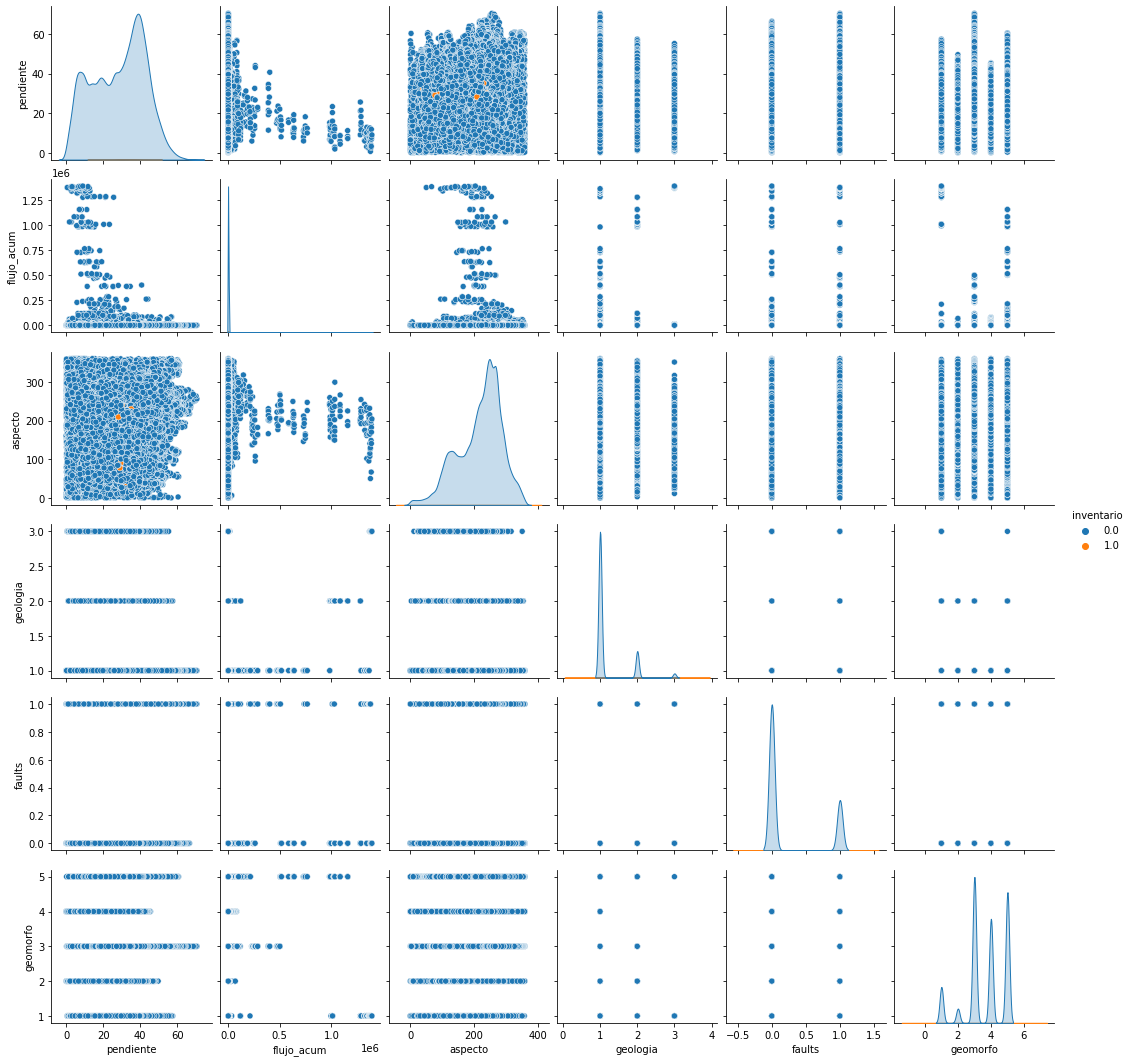

In [39]:
sns.pairplot(df1, hue='inventario');

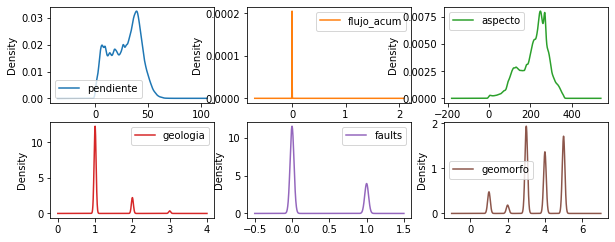

In [42]:
matriz.plot(kind='density', subplots=True, layout=(3, 3), sharex=False, figsize=(10, 6));

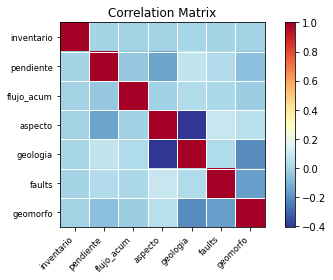

In [43]:
MatCorre=DataFrame(df.corr())
smg.plot_corr(MatCorre, xnames=list(MatCorre.columns)) ;

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


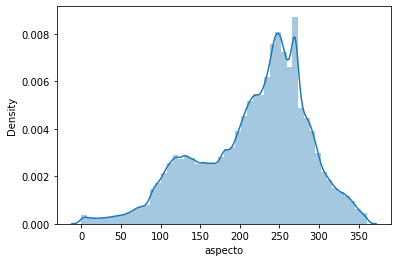

In [44]:
sns.distplot(df['aspecto']);

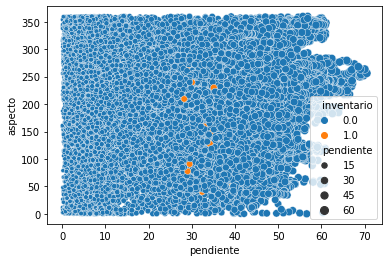

In [45]:
sns.scatterplot(x="pendiente", y="aspecto", hue="inventario", size='pendiente',data=df1);

In [46]:
media=df.groupby('inventario').mean()
print(media)

            pendiente   flujo_acum     aspecto  geologia    faults  geomorfo
inventario                                                                  
0.0         28.270576  1198.921679  217.699341  1.198327  0.255388  3.642172
1.0         32.832439   100.507246  191.536316  1.652174  0.260870  3.173913


In [47]:
landslides=df.inventario.astype(bool)
si_lands=df[landslides]
no_lands=df[~landslides]

In [48]:
si_lands.count()

inventario    69
pendiente     69
flujo_acum    69
aspecto       69
geologia      69
faults        69
geomorfo      69
dtype: int64

In [49]:
no_lands.count()

inventario    1389437
pendiente     1389437
flujo_acum    1389437
aspecto       1389437
geologia      1389437
faults        1389437
geomorfo      1389437
dtype: int64

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


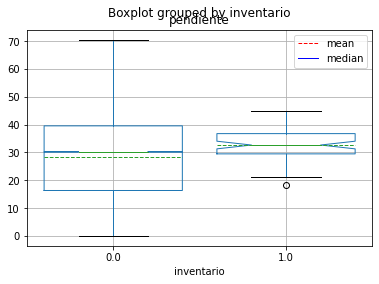

In [50]:
df.boxplot('pendiente', by='inventario', notch=True, widths=0.8, showmeans=True, meanline=True)
plt.plot([], [], '--', linewidth=1, color='red', label='mean')
plt.plot([], [], '-', linewidth=1, color='blue', label='median')
plt.legend();

In [51]:
from scipy import stats
stats.ttest_ind(no_lands["pendiente"], si_lands["pendiente"])

Ttest_indResult(statistic=-2.689683727849914, pvalue=0.007152061944370203)

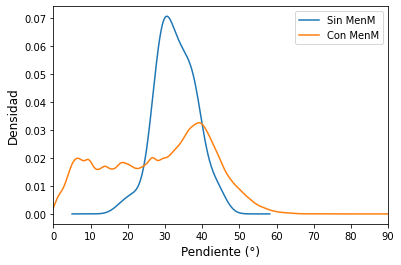

In [52]:
fig, ax = plt.subplots()
si_lands['pendiente'].plot.kde(ax=ax, label='Sin MenM')
no_lands['pendiente'].plot.kde(ax=ax, label='Con MenM')
ax.set_xlim(0,90)
ax.set_xlabel('Pendiente (°)', color='k', size=12)
ax.set_ylabel('Densidad', color='k', size=12)
ax.legend(loc=1, fontsize=10)
ax.tick_params('y', colors='k', labelsize= 10)